In [2]:
import re
import pandas as pd
from matplotlib import pyplot as plt
import csv

In [3]:
log_file = 'log_new.txt'

with open(log_file, 'r') as f:
    log = f.readlines()

snr_pattern = re.compile(r'^\s*INFO:root:\s*SNR Before:\s*(-?[\d.]+),\s*After:\s*(-?[\d.]+)')
psnr_pattern = re.compile(r'^\s*INFO:root:\s*PSNR Before:\s*(-?[\d.]+),\s*After:\s*(-?[\d.]+)')
image_name_pattern = re.compile(r'^\s*INFO:root:\s*Image:\s*(\S+)')

In [4]:
with open("noise_dataset_new/train_noise_type_new.csv", "r") as f:
    reader = csv.reader(f)
    noise_types = list(reader)

train_noise_types = dict(noise_types)

with open("noise_dataset_new/valid_noise_type_new.csv", "r") as f:
    reader = csv.reader(f)
    noise_types = list(reader)

valid_noise_types = dict(noise_types)

In [5]:
snr_before, snr_after, psnr_before, psnr_after, image_name = [], [], [], [], []

for line in log:
    snr_match = snr_pattern.search(line)
    psnr_match = psnr_pattern.search(line)
    image_name_match = image_name_pattern.search(line)
    if image_name_match:
        image_name.append(image_name_match.group(1))
    if snr_match:
        snr_before.append(float(snr_match.group(1)))
        snr_after.append(float(snr_match.group(2)))
    if psnr_match:
        psnr_before.append(float(psnr_match.group(1)))
        psnr_after.append(float(psnr_match.group(2)))


In [6]:
print(f'Number of images: {len(image_name)}')
print(f'Number of SNR values: {len(snr_before)}, {len(snr_after)}')
print(f'Number of PSNR values: {len(psnr_before)}, {len(psnr_after)}')


Number of images: 900
Number of SNR values: 900, 900
Number of PSNR values: 900, 900


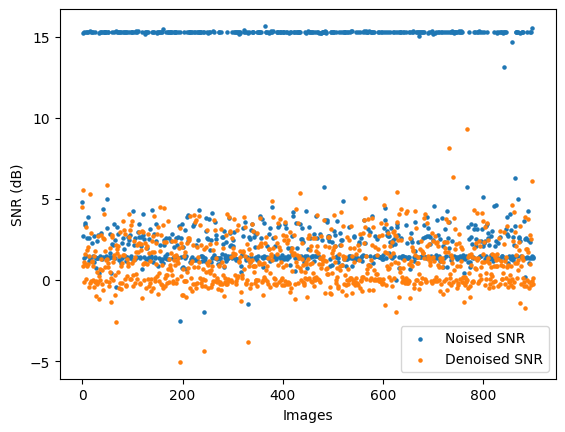

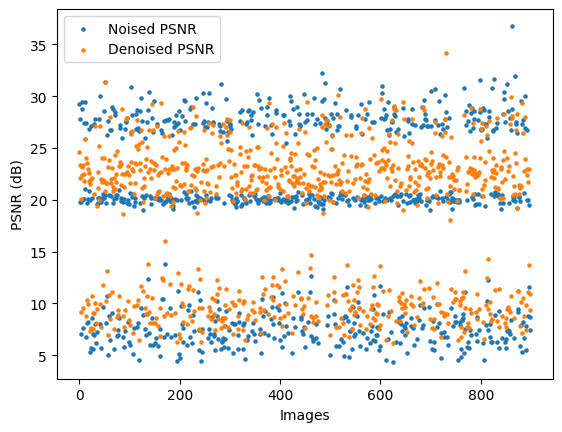

In [7]:
x = range(len(snr_before))
plt.figure()
plt.scatter(x, snr_before, label='Noised SNR', s=5)
plt.scatter(x, snr_after, label='Denoised SNR', s=5)
plt.legend()
plt.xlabel('Images')
plt.ylabel('SNR (dB)')
plt.savefig('snr_new.png')

plt.figure()
plt.scatter(x, psnr_before, label='Noised PSNR', s=5)
plt.scatter(x, psnr_after, label='Denoised PSNR', s=5)
plt.xlabel('Images')
plt.ylabel('PSNR (dB)')
plt.legend()
plt.savefig('psnr_new.png')

In [8]:
psnr_before = pd.Series(psnr_before)
psnr_after = pd.Series(psnr_after)
low_psnr = psnr_before[psnr_after < 15].index
high_psnr = psnr_before[psnr_after >= 25].index
noise_types_cnt = {"gaussian": 0, "poisson": 0, "salt_and_pepper": 0}
low_noise_types_cnt = noise_types_cnt.copy()
high_noise_types_cnt = noise_types_cnt.copy()
for i in low_psnr:
    name = image_name[i]
    if name in train_noise_types:
        low_noise_types_cnt[train_noise_types[name]] += 1
    elif name in valid_noise_types:
        low_noise_types_cnt[valid_noise_types[name]] += 1

for i in high_psnr:
    name = image_name[i]
    if name in train_noise_types:
        high_noise_types_cnt[train_noise_types[name]] += 1
    elif name in valid_noise_types:
        high_noise_types_cnt[valid_noise_types[name]] += 1

print(f"Low PSNR: {low_noise_types_cnt}")
print(f"High PSNR: {high_noise_types_cnt}")


Low PSNR: {'gaussian': 319, 'poisson': 0, 'salt_and_pepper': 0}
High PSNR: {'gaussian': 0, 'poisson': 121, 'salt_and_pepper': 3}


In [9]:
snr_before = pd.Series(snr_before)


high_snr = snr_before[snr_before >= 10].index
noise_types_cnt = {"gaussian": 0, "poisson": 0, "salt_and_pepper": 0}
low_noise_types_cnt = noise_types_cnt.copy()
high_noise_types_cnt = noise_types_cnt.copy()

for i in high_snr:
    name = image_name[i]
    if name in train_noise_types:
        high_noise_types_cnt[train_noise_types[name]] += 1
    elif name in valid_noise_types:
        high_noise_types_cnt[valid_noise_types[name]] += 1

print(f"Low PSNR: {low_noise_types_cnt}")
print(f"High PSNR: {high_noise_types_cnt}")


Low PSNR: {'gaussian': 0, 'poisson': 0, 'salt_and_pepper': 0}
High PSNR: {'gaussian': 0, 'poisson': 0, 'salt_and_pepper': 308}


In [10]:
snr_before, snr_after, psnr_before, psnr_after, image_name

noise_dict = {"snr_before": {"gaussian": [], "poisson": [], "salt_and_pepper": []}, "snr_after": {"gaussian": [], "poisson": [], "salt_and_pepper": []}, "psnr_before": {"gaussian": [], "poisson": [], "salt_and_pepper": []}, "psnr_after": {"gaussian": [], "poisson": [], "salt_and_pepper": []}}

for image in image_name:
    if image in train_noise_types:
        type = train_noise_types[image]
        idx = image_name.index(image)
        
        img_snr_before = snr_before[idx]
        img_snr_after = snr_after[idx]
        img_psnr_before = psnr_before[idx]
        img_psnr_after = psnr_after[idx]

        noise_dict["snr_before"][type].append(img_snr_before)
        noise_dict["snr_after"][type].append(img_snr_after)
        noise_dict["psnr_before"][type].append(img_psnr_before)
        noise_dict["psnr_after"][type].append(img_psnr_after)
    elif image in valid_noise_types:
        type = valid_noise_types[image]
        idx = image_name.index(image)
        
        img_snr_before = snr_before[idx]
        img_snr_after = snr_after[idx]
        img_psnr_before = psnr_before[idx]
        img_psnr_after = psnr_after[idx]

        noise_dict["snr_before"][type].append(img_snr_before)
        noise_dict["snr_after"][type].append(img_snr_after)
        noise_dict["psnr_before"][type].append(img_psnr_before)
        noise_dict["psnr_after"][type].append(img_psnr_after)







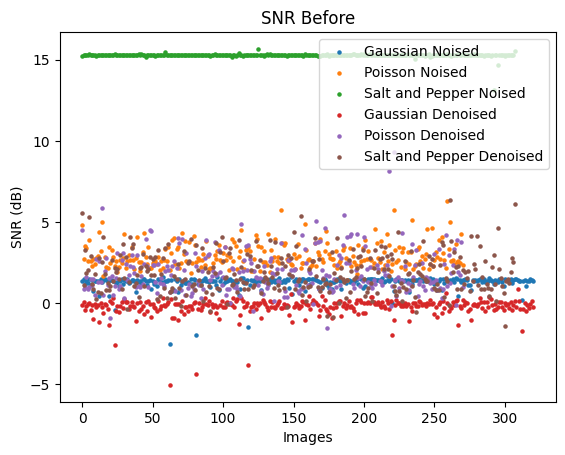

In [11]:
# plot 

plt.figure()
x_g = range(len(noise_dict["snr_before"]["gaussian"]))
x_p = range(len(noise_dict["snr_before"]["poisson"]))
x_s = range(len(noise_dict["snr_before"]["salt_and_pepper"]))
plt.scatter(x_g, noise_dict["snr_before"]["gaussian"], label='Gaussian Noised', s=5)
plt.scatter(x_p, noise_dict["snr_before"]["poisson"], label='Poisson Noised', s=5)
plt.scatter(x_s, noise_dict["snr_before"]["salt_and_pepper"], label='Salt and Pepper Noised', s=5)
plt.scatter(x_g, noise_dict["snr_after"]["gaussian"], label='Gaussian Denoised', s=5)
plt.scatter(x_p, noise_dict["snr_after"]["poisson"], label='Poisson Denoised', s=5)
plt.scatter(x_s, noise_dict["snr_after"]["salt_and_pepper"], label='Salt and Pepper Denoised', s=5)
plt.legend(loc='upper right')
plt.xlabel('Images')
plt.ylabel('SNR (dB)')
plt.title('SNR Before')
plt.savefig('snr_before_all.png')


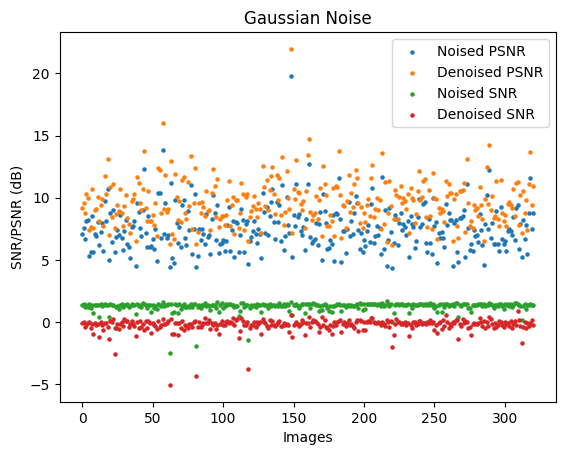

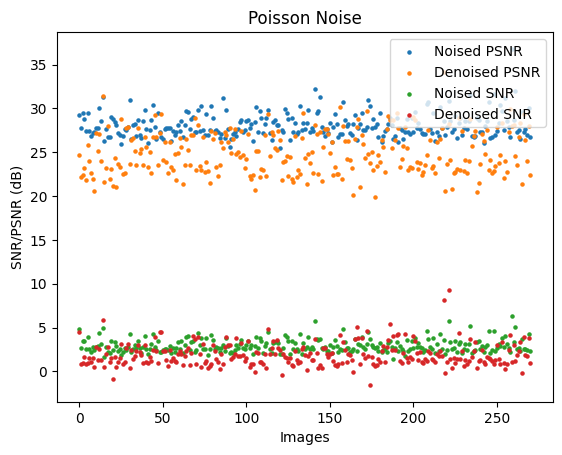

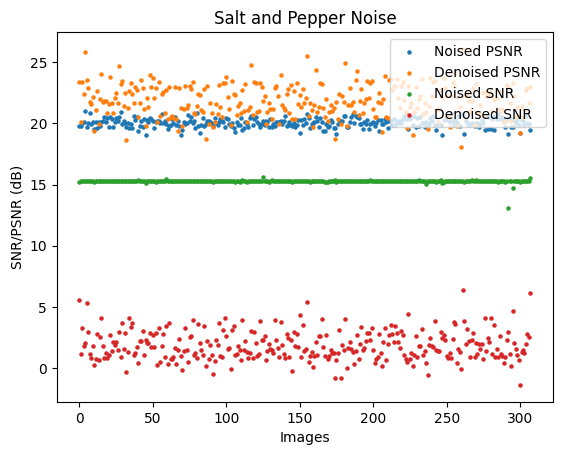

In [13]:
plt.figure()
x_g = range(len(noise_dict["snr_before"]["gaussian"]))
x_p = range(len(noise_dict["snr_before"]["poisson"]))
x_s = range(len(noise_dict["snr_before"]["salt_and_pepper"]))
plt.scatter(x_g, noise_dict["psnr_before"]["gaussian"], label='Noised PSNR', s=5)
plt.scatter(x_g, noise_dict["psnr_after"]["gaussian"], label='Denoised PSNR', s=5)
plt.scatter(x_g, noise_dict["snr_before"]["gaussian"], label='Noised SNR', s=5)
plt.scatter(x_g, noise_dict["snr_after"]["gaussian"], label='Denoised SNR', s=5)
plt.legend(loc = 'upper right')
plt.xlabel('Images')
plt.ylabel('SNR/PSNR (dB)')
plt.title('Gaussian Noise')
plt.savefig('gaussian_noise.png')

plt.figure()
plt.scatter(x_p, noise_dict["psnr_before"]["poisson"], label='Noised PSNR', s=5)
plt.scatter(x_p, noise_dict["psnr_after"]["poisson"], label='Denoised PSNR', s=5)
plt.scatter(x_p, noise_dict["snr_before"]["poisson"], label='Noised SNR', s=5)
plt.scatter(x_p, noise_dict["snr_after"]["poisson"], label='Denoised SNR', s=5)
plt.legend(loc = 'upper right')
plt.xlabel('Images')
plt.ylabel('SNR/PSNR (dB)')
plt.title('Poisson Noise')
plt.savefig('poisson_noise.png')

plt.figure()
plt.scatter(x_s, noise_dict["psnr_before"]["salt_and_pepper"], label='Noised PSNR', s=5)
plt.scatter(x_s, noise_dict["psnr_after"]["salt_and_pepper"], label='Denoised PSNR', s=5)
plt.scatter(x_s, noise_dict["snr_before"]["salt_and_pepper"], label='Noised SNR', s=5)
plt.scatter(x_s, noise_dict["snr_after"]["salt_and_pepper"], label='Denoised SNR', s=5)
plt.legend(loc = 'upper right')
plt.xlabel('Images')
plt.ylabel('SNR/PSNR (dB)')
plt.title('Salt and Pepper Noise')
plt.savefig('salt_and_pepper_noise.png')

